In [30]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime,timedelta
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import numpy as np
from sklearn.svm import SVR
import xgboost as xgb


tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)  

# Import Data

In [31]:
calendar_df = pd.read_csv('calendar.csv')
listings_df = pd.read_csv('listings.csv')
reviews_df = pd.read_csv('reviews.csv')

# Missing elements

In [3]:
print("Number of elements",listings_df.shape[0])
listings_df.isnull().sum(axis = 0).sort_values(ascending=False)


Number of elements 3585


neighbourhood_group_cleansed        3585
jurisdiction_names                  3585
license                             3585
has_availability                    3585
square_feet                         3529
monthly_price                       2697
weekly_price                        2693
security_deposit                    2243
notes                               1975
interaction                         1554
access                              1489
neighborhood_overview               1415
host_about                          1309
transit                             1290
house_rules                         1192
cleaning_fee                        1107
space                               1057
review_scores_accuracy               823
review_scores_location               822
review_scores_value                  821
review_scores_checkin                820
review_scores_cleanliness            818
review_scores_communication          818
review_scores_rating                 813
reviews_per_mont

# Description of the data

In [25]:
listings_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,3585.0,8.440875e+06,4.500787e+06,3.353000e+03,4.679319e+06,8.577620e+06,1.278953e+07,1.493346e+07
scrape_id,3585.0,2.016091e+13,0.000000e+00,2.016091e+13,2.016091e+13,2.016091e+13,2.016091e+13,2.016091e+13
host_id,3585.0,2.492311e+07,2.292781e+07,4.240000e+03,6.103425e+06,1.928100e+07,3.622147e+07,9.385411e+07
host_listings_count,3585.0,5.890237e+01,1.711197e+02,0.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00,7.490000e+02
host_total_listings_count,3585.0,5.890237e+01,1.711197e+02,0.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00,7.490000e+02
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,3585.0,4.234003e+01,2.440255e-02,4.223594e+01,4.232999e+01,4.234520e+01,4.235469e+01,4.238998e+01
longitude,3585.0,-7.108482e+01,3.156464e-02,-7.117179e+01,-7.110508e+01,-7.107843e+01,-7.106215e+01,-7.100010e+01
accommodates,3585.0,3.041283e+00,1.778929e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,3571.0,1.221647e+00,5.014871e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00


In [5]:
listings_df.cancellation_policy.value_counts()


strict             1582
flexible            999
moderate            919
super_strict_30      85
Name: cancellation_policy, dtype: int64

In [7]:
#listings_df.hist(figsize=(20,20));

# Analyze extremes

In [8]:
#remove extreme: price, ninimum nights, maximum nights
#1125, 59, 3475, 1764, 697,1649, 2285, 3055
listings_df.minimum_nights.sort_values(ascending=False)
listings_df.price.sort_values(ascending=False).head()

2485    $999.00
879      $99.00
1112     $99.00
1560     $99.00
805      $99.00
Name: price, dtype: object

# Check price differences over time

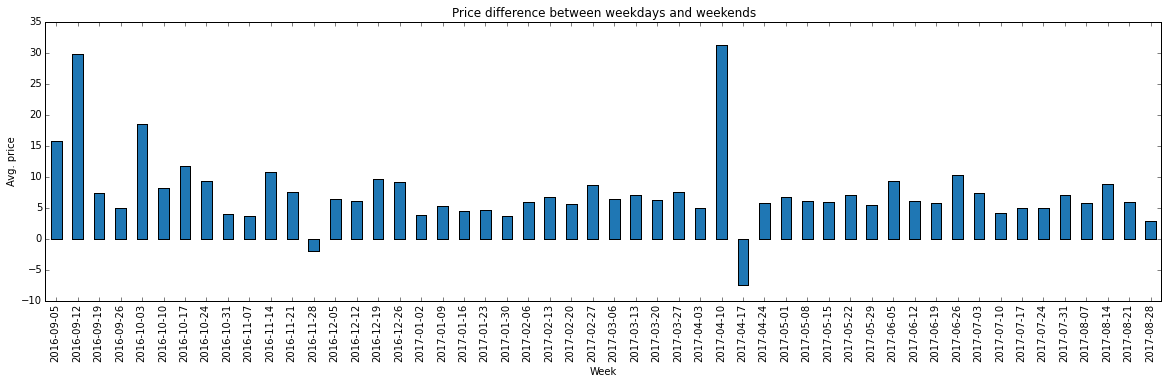

In [22]:
# Turn the price to float
calendar_df = pd.read_csv('calendar.csv')
calendar_df['price'] = calendar_df['price'].apply(lambda x: float(x[1:].replace(',','')) if isinstance(x,str) else x )
calendar_df['month'] = calendar_df['date'].apply(lambda x: datetime.strptime(x[0:7],'%Y-%m' ) )
calendar_df['date'] = calendar_df['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d' ) )
temp_available = calendar_df[calendar_df.available == 't'].groupby(['date'])['price'].agg(['mean','count'])
temp_all = calendar_df.groupby(['date'])['available'].agg(['count']).rename(columns={'count':'count_all'})
result = pd.concat([temp_available,temp_all],axis=1)
result['count_perc'] = result['count']/result['count_all']*100
result.index = [datetime.date(x) for x in result.index]
result['Avg. Price'] = result['mean']
result['Availability (%)'] = result['count_perc'].tolist()
result['weekday'] = [ 1 if x.weekday()<4 or x.weekday()==6 else 0 for x in result.index]
result['week'] = [ x-timedelta(days=x.weekday())  for x in result.index]
result['month'] = [ x- timedelta(days=x.day-1)  for x in result.index]
delta = result[result.weekday==0].groupby('week').mean()['mean']-result[result.weekday==1].groupby('week').mean()['mean']

fig = plt.figure()
ax = delta[0:-1].plot(kind='bar',figsize=(20,5),color=tableau20[0],title='Price difference between weekdays and weekends');
ax.set_ylabel("Avg. price");
ax.set_xlabel("Week");
fig.savefig('Price difference between weekdays and weekends.png',bbox_inches='tight')

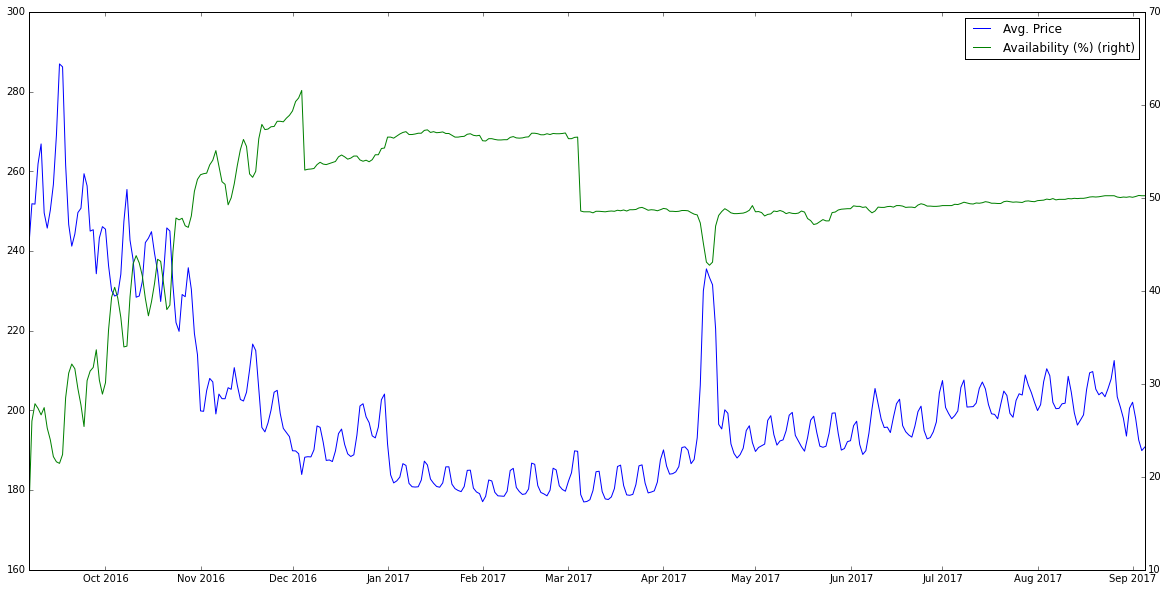

In [24]:
fig = plt.figure()
result[['Avg. Price','Availability (%)']].plot(secondary_y =('Availability (%)'),figsize=(20,10) )
fig.savefig('Price evolution.png',bbox_inches='tight')

# Analyse monthly price variations

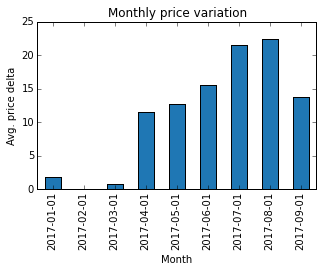

In [10]:
fig = plt.figure()
ax=( (result[0:220].append(result[224::]) ).groupby('month').mean()['mean']-180.954283)[4::].plot(kind='bar',
                                                                                                  figsize=(5,3),
                                                                                                  color=tableau20[0],
                                                                                                  title='Monthly price variation');
ax.set_ylabel("Avg. price delta");
ax.set_xlabel("Month");
fig.savefig('Monthly price variation.png',bbox_inches='tight')


# Market Concentration: 
How much of the market is own by a small percentage of the hosts?

In [138]:
temp=listings_df.groupby(['host_id']).count().id.sort_values(ascending=False)
temp = pd.DataFrame(temp)
temp.columns = ['Number of accommodations']
temp['Cummulative'] = temp['Number of accommodations'].cumsum()
temp['Total'] = temp['Number of accommodations'].sum()
temp['Market Share'] = temp['Cummulative']/temp['Total']*100
temp['Number of hosts'] = 1
temp['Number of hosts'] = temp['Number of hosts'].cumsum()
temp['Percentage of hosts'] = temp['Number of hosts']/temp.shape[0]*100
temp[temp['Number of accommodations']>8]

,Number of accommodations,Cummulative,Total,Market Share,Number of hosts,Percentage of hosts
host_id,,,,,,
30283594,136,136,3585,3.793584,1,0.045851
25188,79,215,3585,5.997211,2,0.091701
9419684,61,276,3585,7.698745,3,0.137552
12243051,58,334,3585,9.316597,4,0.183402
22348222,50,384,3585,10.711297,5,0.229253
4962900,25,409,3585,11.408647,6,0.275103
26956083,24,433,3585,12.078103,7,0.320954
21184200,24,457,3585,12.747559,8,0.366804
1444340,24,481,3585,13.417015,9,0.412655


# Market concentration
How is the pricing of the host owning the most flats?

Cleaning fee of host 30283594 is: 100.0


,Avg. cleaning fee,Count of accommodations,cleaning_fee
accommodates,,,
1,87.352941,17,NaN
2,81.609223,412,NaN
3,77.021505,279,100.0
4,78.923077,442,NaN
5,98.719048,210,100.0
6,96.309524,168,100.0
7,113.918919,37,NaN
8,116.931818,44,NaN
9,96.666667,9,NaN


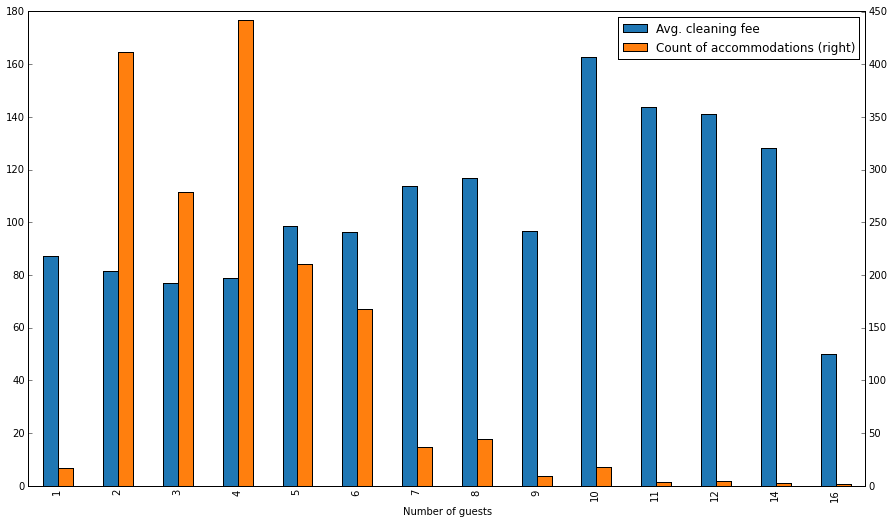

In [166]:
listings_df.cleaning_fee = listings_df.cleaning_fee.apply(lambda x: float(x[1::].replace(',','')) 
                                                          if isinstance(x, str) else x)
temp = listings_df[listings_df.room_type=='Entire home/apt'].groupby(['accommodates']).agg({'cleaning_fee':['mean','count']})
temp.columns= ['Avg. cleaning fee','Count of accommodations']


plt.figure(figsize=(12, 14))    
  
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 

temp.plot(kind='bar',secondary_y='Count of accommodations',color=tableau20[0::2],figsize=(15,8.5),ax=ax)



ax.set_xlabel("Number of guests")
#ax.legend(loc='upper center')

plt.savefig("Cleaning fee.png", bbox_inches="tight")  

print("Cleaning fee of host 30283594 is:",listings_df[listings_df.host_id==30283594].cleaning_fee.mean())
temp.merge(pd.DataFrame(listings_df[listings_df.host_id==30283594].groupby(['accommodates']).mean().cleaning_fee),
           how='outer',left_index=True,right_index=True)



# Market Concentration
How is the pricing for the host renting the most places?

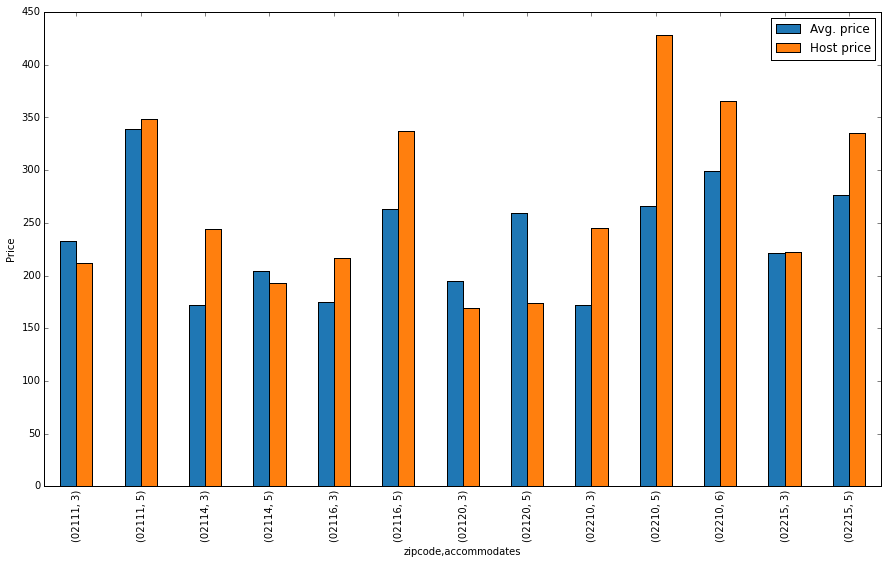

In [183]:
temp = listings_df[listings_df.host_id==30283594][['id','zipcode','accommodates','price']].copy()
temp.price = temp.price.apply(lambda x: float(x[1::]) if isinstance(x, str) else x)
temp=temp.groupby(['zipcode','accommodates']).mean().price

listings_df.price = listings_df[listings_df.room_type=='Entire home/apt'].price.apply(lambda x: float(x[1::].replace(',','')) 
                                                                                      if isinstance(x, str) else x)
temp2=listings_df[listings_df.host_id!=30283594].groupby(['zipcode','accommodates']).mean().price

result = pd.DataFrame(temp).merge(pd.DataFrame(temp2),left_index=True,right_index=True)
result.columns = ['Avg. price','Host price']
ax = result.plot(kind='bar',color=tableau20[0::2],figsize=(15,8.5))
ax.set_ylabel("Price")
plt.savefig("Price.png", bbox_inches="tight")  



# Percentage of offers per room type and locations

/Users/juliasuc/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


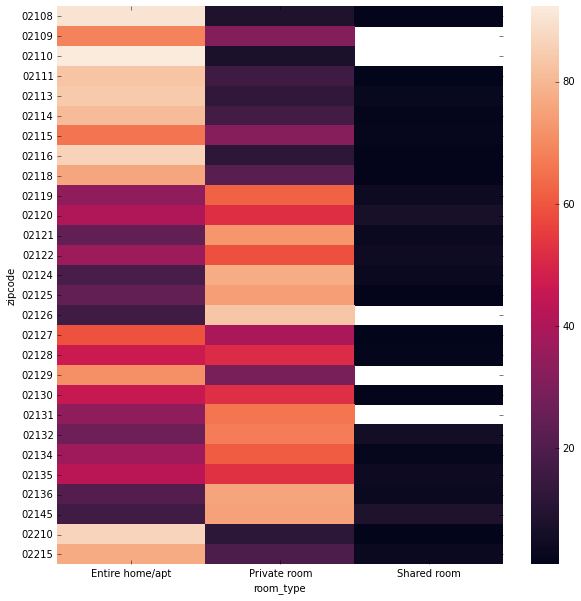

In [18]:
listings_df.zipcode = listings_df.zipcode.apply(lambda x: x[0:5] if isinstance(x,str) else x)
temp=listings_df.groupby(['zipcode','room_type']).count().id
temp = temp.unstack(level=-1)
temp['sum'] = temp.sum(axis=1).tolist()
for c in ['Entire home/apt','Private room','Shared room']:
    temp[c] = temp[c]/temp['sum']*100

import seaborn as sns
temp = temp[temp['sum']>10]
temp = temp.drop(['sum'],axis=1)

fig = plt.figure(figsize=(10,10))
sns.heatmap(temp)
plt.savefig("room_type_zipcode.png", bbox_inches="tight")  


# Price per location and room type

/Users/juliasuc/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


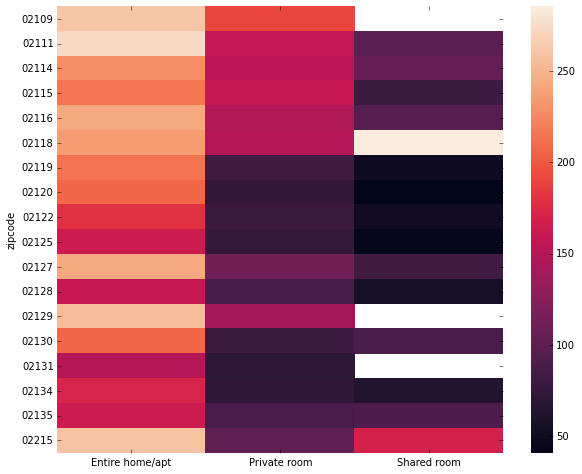

In [46]:
listings_df.price = listings_df.price.apply(lambda x: float(x[1::].replace(',','')) if isinstance(x, str) else x)
temp = listings_df.groupby(['zipcode','room_type']).agg({'price':['mean','count']}).price

temp = temp.unstack(level=-1)
temp.columns = ['mean_entire','mean_pr','mean_sr','count_entire','count_pr','count_sr']
temp = temp[(temp['count_entire']>15)&(temp['count_pr']>15)]

temp = temp[['mean_entire','mean_pr','mean_sr']]
temp.columns = ['Entire home/apt','Private room','Shared room']

fig = plt.figure(figsize=(10,8))
sns.heatmap(temp)
plt.savefig("price_repartition.png", bbox_inches="tight")  

# Data Cleaning

In [32]:
#remove empty columns
listings_df = listings_df.drop(['neighbourhood_group_cleansed','jurisdiction_names',
                                'license','has_availability'],axis=1)

#remove columns missing too much data
listings_df = listings_df.drop(['square_feet','monthly_price','weekly_price','security_deposit'],axis=1)

#delete unecessary data (repetitive data)
listings_df = listings_df.drop(['listing_url','host_total_listings_count','host_url'],axis=1)
listings_df = listings_df.drop(['host_thumbnail_url','host_picture_url','picture_url'],axis=1)
listings_df = listings_df.drop(['host_name','host_id','latitude','longitude'],axis=1)

# drop neighbourhood because duplicates neighbourhood_cleansed 
listings_df = listings_df.drop(['neighbourhood'],axis=1)

#delete data which is always the same
unique_value_col = []
for col in listings_df.columns:
    if len(listings_df[col].value_counts())==1:
        unique_value_col.append(col)

print("Columns with only the same value: ",unique_value_col)

listings_df = listings_df.drop(unique_value_col,axis=1)

# Check that all cleaning_fee have been entered in $
listings_df['currency'] = listings_df['cleaning_fee'].apply(lambda x: x[0:1] 
                                                            if isinstance(x,str) else x )
print("Check that only $ have been used:",listings_df['currency'].value_counts())
listings_df = listings_df.drop(['currency'],axis=1)

# Turn cleaning_fee to float
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].apply(lambda x: float(x[1:]) 
                                                                if isinstance(x,str) else x )
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].fillna(0)

# Turn boolean to 1 if house_rules have been given else 0
listings_df['house_rules_boolean'] = listings_df['house_rules'].apply(lambda x: 1 
                                                                      if isinstance(x,str) else 0 )
listings_df = listings_df.drop(['house_rules'],axis=1)

# Turn the price to float
listings_df['price'] = listings_df['price'].apply(lambda x: float(x[1:].replace(',','')) 
                                                  if isinstance(x,str) else 0 )
listings_df['extra_people'] = listings_df['extra_people'].apply(lambda x: float(x[1:].replace(',','')) 
                                                                if isinstance(x,str) else 0 )

# Turn to float
listings_df['host_response_rate'] = listings_df['host_response_rate'].apply(lambda x: float(x.replace('%','')) 
                                                                            if isinstance(x,str) else 0 )
listings_df['host_acceptance_rate'] = listings_df['host_acceptance_rate'].apply(lambda x: float(x.replace('%','')) 
                                                                                if isinstance(x,str) else 0 )

listings_df = listings_df.drop(['thumbnail_url','medium_url','xl_picture_url'], axis=1)

# Remove extreme: price, ninimum nights, maximum nights
#1125, 59, 3475, 1764, 697,1649, 2285, 3055
listings_df = listings_df.drop([1125, 59, 3475, 1764, 697,1649, 2285, 3055], axis=0)

# Only considers the Boston market (remove 4 entries)
listings_df = listings_df[listings_df.market=='Boston']
listings_df = listings_df[listings_df.city=='Boston']

listings_df = listings_df.drop(['market','city','smart_location','street'], axis=1)

# Convert boolean t/f to 1/0
for col in ['is_location_exact','host_identity_verified','host_is_superhost','host_has_profile_pic',
            'instant_bookable','require_guest_profile_picture','require_guest_phone_verification']:
    listings_df[col] = listings_df[col].apply(lambda x: 1 if x=='t' else 0)

#convert dates to number of days since today
listings_df.host_since = (datetime.now() - pd.to_datetime(listings_df.host_since,format='%Y-%m-%d')).dt.days
listings_df.first_review = (datetime.now() - pd.to_datetime(listings_df.first_review,format='%Y-%m-%d')).dt.days
listings_df.last_review = (datetime.now() - pd.to_datetime(listings_df.last_review,format='%Y-%m-%d')).dt.days

# Just keep the information about the number of verifications made
listings_df.host_verifications = listings_df.host_verifications.apply(lambda x: len(x))

# Convert cancellation policy to a scale
cancellation_policy_dict = {'flexible':1, 'moderate':2,'strict':3, 'super_strict_30':4}
listings_df.cancellation_policy = listings_df.cancellation_policy.apply(lambda x: cancellation_policy_dict[x])

listings_df.zipcode = listings_df.zipcode.apply(lambda x: x[0:5] if isinstance(x,str) else x)

Columns with only the same value:  ['scrape_id', 'last_scraped', 'experiences_offered', 'state', 'country_code', 'country', 'calendar_last_scraped', 'requires_license']
Check that only $ have been used: $    2478
Name: currency, dtype: int64


In [33]:
listings_df = listings_df.drop(['id','name','summary','space','description','neighborhood_overview','notes',
                                'transit','access','interaction','host_location','host_about',
                                'host_response_time','host_neighbourhood','calendar_updated'],axis=1)

# What are the most important features?

Preparing listings_df for predictive model and PCA

In [34]:
listings_df = pd.concat([listings_df,pd.get_dummies(listings_df.bed_type, drop_first=True)] ,axis=1)
listings_df = listings_df.drop(['bed_type'],axis=1)

listings_df = pd.concat([listings_df,pd.get_dummies(listings_df.property_type)] ,axis=1)
listings_df = listings_df.drop(['property_type'],axis=1)

listings_df = pd.concat([listings_df,pd.get_dummies(listings_df.room_type, drop_first=True)] ,axis=1)
listings_df = listings_df.drop(['room_type'],axis=1)

listings_df = pd.concat([listings_df,pd.get_dummies(listings_df.neighbourhood_cleansed, drop_first=True)] ,axis=1)
listings_df = listings_df.drop(['neighbourhood_cleansed'],axis=1)


listings_df = pd.concat([listings_df,pd.get_dummies(listings_df.zipcode)] ,axis=1)
listings_df = listings_df.drop(['zipcode'],axis=1)

In [35]:
listings_df.amenities=listings_df.amenities.apply(lambda x: x[1:-2].split(',') )
flatten_list = list(set([item for sublist in listings_df.amenities.tolist() for item in sublist]))

for l in flatten_list:
    listings_df[l] = listings_df.amenities.apply(lambda x: 1 if l in x else 0)

listings_df = listings_df.drop(['amenities'],axis=1)

A look at the correlation

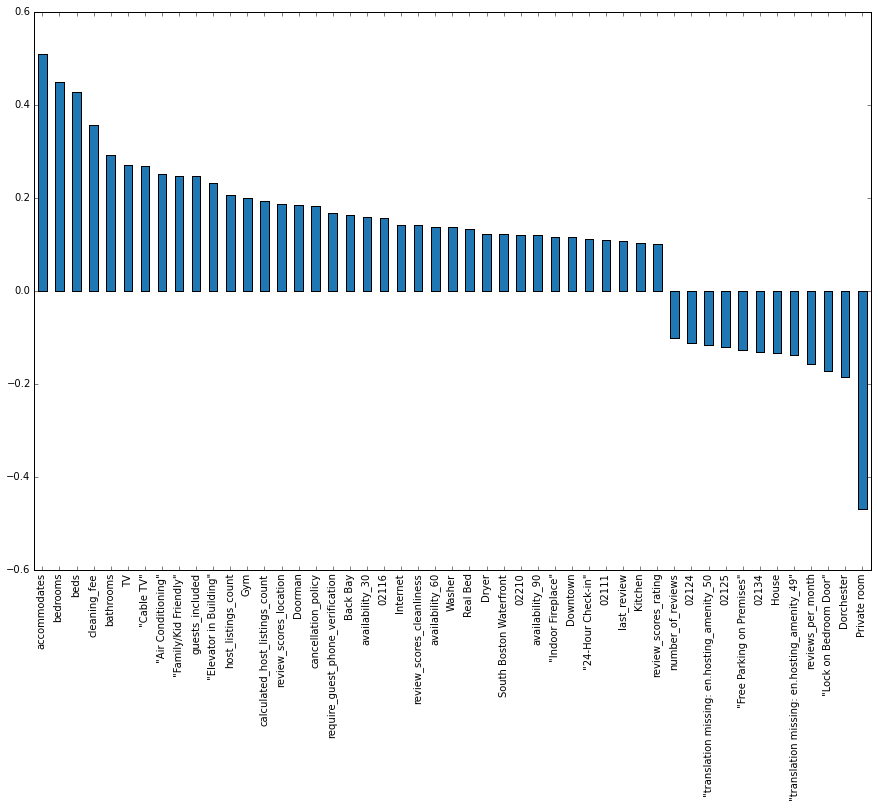

In [26]:
fig = plt.figure(figsize=(15,10))

corr_df = listings_df.corr()['price'].sort_values(ascending=False)
corr_df = corr_df.drop(['price'],axis=0)
corr_df[corr_df.abs()>0.1].plot(kind='bar',color=tableau20[0])

plt.savefig("corr.png", bbox_inches="tight")  

A look at the principal components

Variance explained:  0.83425636606
(2578, 91) (2578, 183)


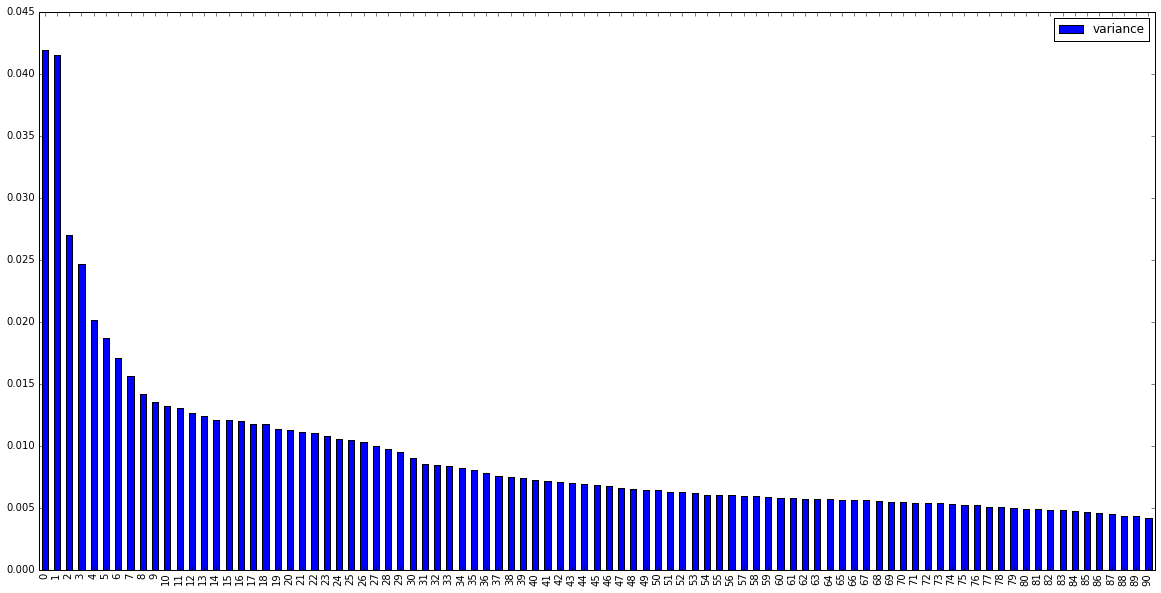

In [27]:
listings_df = listings_df.dropna()
temp_pca = listings_df.drop(['price'],axis=1)
features = temp_pca.columns
scaler = StandardScaler()
temp_pca = scaler.fit_transform(temp_pca)

n_components = 91#182
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(temp_pca)

pca_result = pd.DataFrame()
pca_result['variance']=pca.explained_variance_ratio_
pca_result.plot(kind='bar', figsize=(20,10))
print('Variance explained: ',pca_result.variance.sum() )

listings_final = pd.DataFrame(data = principalComponents)
listings_final.index = listings_df.index
print(listings_final.shape, listings_df.shape)
listings_final = pd.concat([listings_final, listings_df[['price']]], axis = 1)


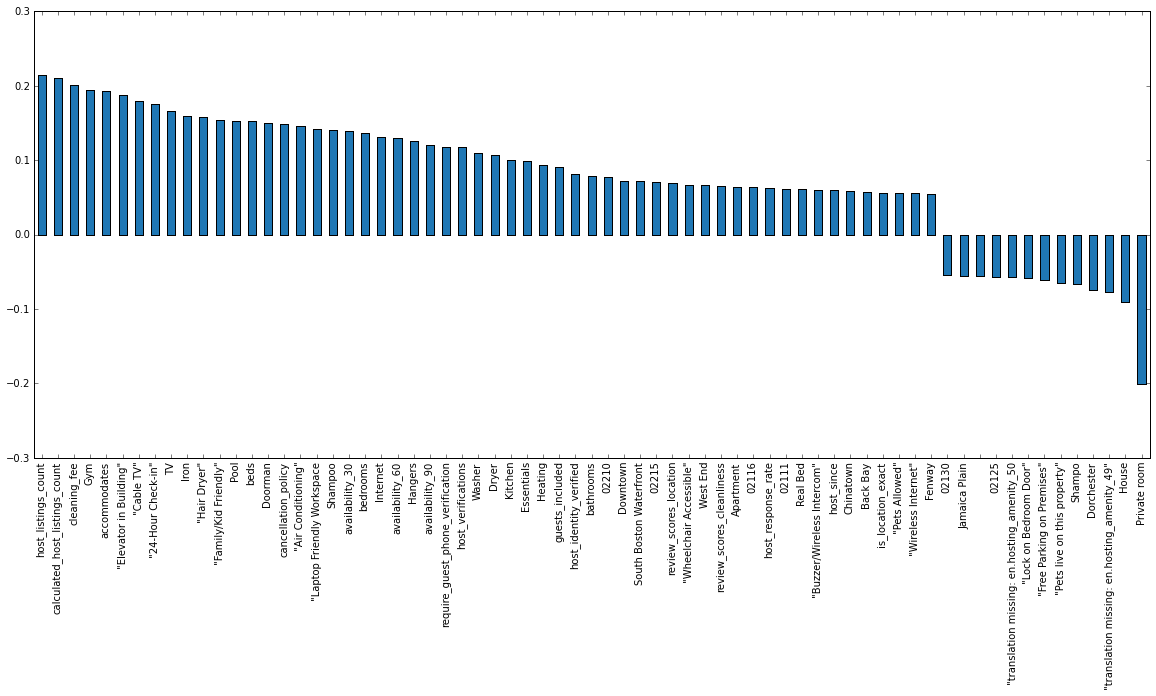

In [29]:
principalComponents_coeff = pd.DataFrame(index=features)
for col in range(n_components):
    principalComponents_coeff[col] = pca.components_[col]

pc_temp = principalComponents_coeff[0].sort_values()
fig = plt.figure(figsize=(20,8))
pc_temp[pc_temp.abs()>0.05].sort_values(ascending=False).plot(kind='bar',
                                                             color=tableau20[0])
plt.savefig("pca0.png", bbox_inches="tight")  

Predictions

In [86]:
def validation_metrics(y_train, y_train_pred, y_test,y_pred):
    '''
    INPUT
    y_train - labels of the training set
    y_train_pred - predicted labels for the training set
    y_test - labels of the testing set
    y_pred - predictive lables of the testing set
    
    OUTPUT
    Prints the r2 score, MAE and RMSE for the training and testing sets prediction
    '''
    print('r2 score test: ',r2_score(y_test,y_pred))
    print('mean absolute error test: ',mean_absolute_error(y_test,y_pred))
    print('rmse: ',mean_squared_error(y_test,y_pred))

    print('r2 score train: ',r2_score(y_train,y_train_pred))
    print('mean score error train: ',mean_absolute_error(y_train,y_train_pred))
    print('rmse: ',mean_squared_error(y_train,y_train_pred))
    return

def get_model_coeff(model,features,threshold):
    '''
    INPUT
    model - fitted machine learning model
    features - list of the features used as input
    threshold - integer
    OUTPUT
    Plot of the features whose coeff is larger than threshold in absolute value
    '''
    coeff_df = pd.DataFrame()
    coeff_df['coeff'] = model.best_estimator_.coef_
    coeff_df.index = features
    coeff_df[coeff_df.coeff.abs()>threshold].sort_values(['coeff'], ascending=False).plot(kind='bar',
                                                                                          figsize=(25,8), 
                                                                                          color=tableau20[1])
    return 

def fit_pred(model,listings_df,parameters):
    '''
    INPUT
    model - machine learning model to be trained
    listing_df - cleaned data to be used
    paramters - parameters with which the model should be trained to find the best suitable model
    
    OUTPUT
    model - trained model
    X_train - data set of the features used for training
    X_test - data set of the features used for testing
    y_train - labels used for training
    y_test - labels used for testing
    y_train_pred - prediction made by the model with the training data
    y_test_pred - prediction made by the model with the testing data
    '''
    

    X = listings_df.copy().drop(['price'],axis=1)
    y = listings_df.price

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    
    model = GridSearchCV(model,
                        parameters,
                        cv = 3,
                        #n_jobs = 5,
                        verbose=True)
    #one_drop
    
    model = model.fit(X_train.values, y_train.values)
    
    y_pred = model.predict(X_test.values)
    y_train_pred = model.predict(X_train.values)
    
    validation_metrics(y_train, y_train_pred, y_test,y_pred)
    
    return model, X_train, X_test, y_train, y_test, y_train_pred, y_pred





In [74]:
#model = LinearRegression()
#model = Lasso(alpha=0.1, normalize=True)
#model = ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.8,
      #max_iter=1000, normalize=False, positive=False, precompute=False,
      #random_state=0, selection='cyclic', tol=0.0001, warm_start=False)
#model = SVR(C=1,epsilon=0.01)

model = xgb.XGBRegressor()
listings_df = listings_df.dropna()
parameters = {#'nthread':[4], #when use hyperthread, xgboost may become slower
              'booster':['gblinear'],
              'objective':['reg:linear'],
              'learning_rate': [0.03,0.05,0.1,0.5], #so called `eta` value
              'max_depth': [2,3],
              'min_child_weight': [3,5,7],
              'n_estimators': [300,500,700],
              'subsample':[0.5]}  #set to 0.5 to try to avoid overfitting


model, X_train, X_test, y_train, y_test, y_train_pred, y_pred = fit_pred(model,listings_df,parameters)



Fitting 3 folds for each of 72 candidates, totalling 216 fits
r2 score test:  0.52449409562
mean absolute error test:  50.6538007156
rmse:  5170.2065195
r2 score train:  0.525810397448
mean score error train:  52.96019659
rmse:  6692.06081294


[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:  9.2min finished


# Results when training with linear booster
Display coefficients of importance

r2 score test:  0.52449409562
mean absolute error test:  50.6538007156
rmse:  5170.2065195
r2 score train:  0.525810397448
mean score error train:  52.96019659
rmse:  6692.06081294
{'learning_rate': 0.5, 'objective': 'reg:linear', 'booster': 'gblinear', 'n_estimators': 700, 'min_child_weight': 3, 'max_depth': 2, 'subsample': 0.5}


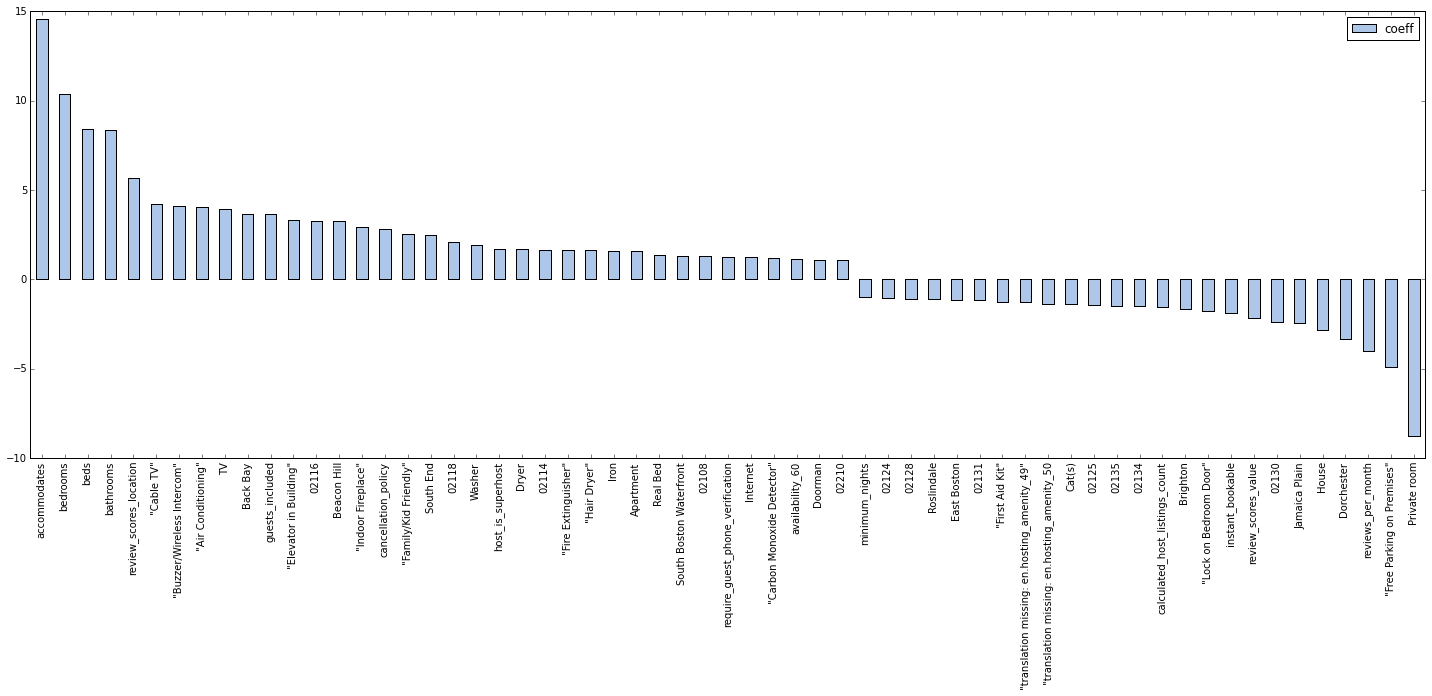

In [88]:
validation_metrics(y_train, y_train_pred, y_test,y_pred)
print(model.best_params_)
features = listings_df.drop(['price'],axis=1).columns

get_model_coeff(model,features,1)

# Results when training with booster gbtree

In [54]:
validation_metrics(y_train, y_train_pred, y_test,y_pred)
print(model.best_params_)
features = listings_df.drop(['price'],axis=1).columns


r2 score test:  0.673143334394
mean absolute error test:  38.3686573643
rmse:  3553.93371121
r2 score train:  0.918126830513
mean score error train:  24.4674467149
rmse:  1155.44547204
{'learning_rate': 0.05, 'objective': 'reg:linear', 'booster': 'gbtree', 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 3, 'subsample': 0.5}


There is overfitting and therefore I was interesting in reducing it and followed the explanation provided in the following article: https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/

In [60]:
modelbest = xgb.XGBRegressor()
modelbest.parameters = model.best_params_
eval_set = [(X_train.values, y_train), (X_test.values, y_test)]
modelbest = modelbest.fit(X_train.values, y_train.values,eval_metric="rmse", eval_set=eval_set, verbose=True)
y_predbest = modelbest.predict(X_test.values)
y_train_predbest = modelbest.predict(X_train.values)

validation_metrics(y_train, y_train_predbest, y_test,y_predbest)

[0]	validation_0-rmse:189.974	validation_1-rmse:179.779
[1]	validation_0-rmse:174.418	validation_1-rmse:164.741
[2]	validation_0-rmse:160.646	validation_1-rmse:151.353
[3]	validation_0-rmse:148.479	validation_1-rmse:139.687
[4]	validation_0-rmse:137.764	validation_1-rmse:129.526
[5]	validation_0-rmse:128.367	validation_1-rmse:120.541
[6]	validation_0-rmse:120.101	validation_1-rmse:112.731
[7]	validation_0-rmse:112.885	validation_1-rmse:106.156
[8]	validation_0-rmse:106.603	validation_1-rmse:100.418
[9]	validation_0-rmse:101.054	validation_1-rmse:95.3419
[10]	validation_0-rmse:96.3027	validation_1-rmse:91.1889
[11]	validation_0-rmse:92.135	validation_1-rmse:87.637
[12]	validation_0-rmse:88.4023	validation_1-rmse:84.4912
[13]	validation_0-rmse:85.1462	validation_1-rmse:81.8602
[14]	validation_0-rmse:82.213	validation_1-rmse:79.3693
[15]	validation_0-rmse:79.8028	validation_1-rmse:77.7619
[16]	validation_0-rmse:77.6423	validation_1-rmse:76.2152
[17]	validation_0-rmse:75.6354	validation_1-

/Users/juliasuc/anaconda/lib/python3.5/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


The overfitting effect can be represented on a graph

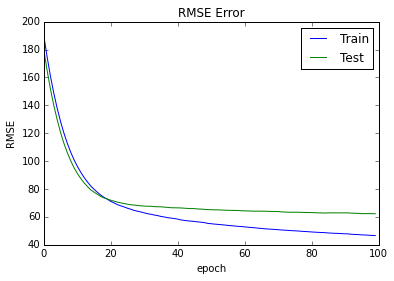

In [64]:
fig, ax = plt.subplots()
results = modelbest.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.title('RMSE Error')
plt.show()

Add early stopping to avoid overfitting -> it doesn't stop much earlier as indeed the rmse is always decreasing for the testing set

In [71]:
modelbest = xgb.XGBRegressor()
modelbest.parameters = model.best_params_
eval_set = [(X_train.values, y_train), (X_test.values, y_test)]
modelbest = modelbest.fit(X_train.values, y_train.values,early_stopping_rounds=2, eval_metric="rmse", eval_set=eval_set, verbose=True)
y_predbest = modelbest.predict(X_test.values)
y_train_predbest = modelbest.predict(X_train.values)

validation_metrics(y_train, y_train_predbest, y_test,y_predbest)

[0]	validation_0-rmse:189.974	validation_1-rmse:179.779
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:174.418	validation_1-rmse:164.741
[2]	validation_0-rmse:160.646	validation_1-rmse:151.353
[3]	validation_0-rmse:148.479	validation_1-rmse:139.687
[4]	validation_0-rmse:137.764	validation_1-rmse:129.526
[5]	validation_0-rmse:128.367	validation_1-rmse:120.541
[6]	validation_0-rmse:120.101	validation_1-rmse:112.731
[7]	validation_0-rmse:112.885	validation_1-rmse:106.156
[8]	validation_0-rmse:106.603	validation_1-rmse:100.418
[9]	validation_0-rmse:101.054	validation_1-rmse:95.3419
[10]	validation_0-rmse:96.3027	validation_1-rmse:91.1889
[11]	validation_0-rmse:92.135	validation_1-rmse:87.637
[12]	validation_0-rmse:88.4023	validation_1-rmse:84.4912
[13]	validation_0-rmse:85.1462	validation_1-rmse:81.8602
[14]	validation_0-rmse:82.213	validation_1-rmse:79.3693


/Users/juliasuc/anaconda/lib/python3.5/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


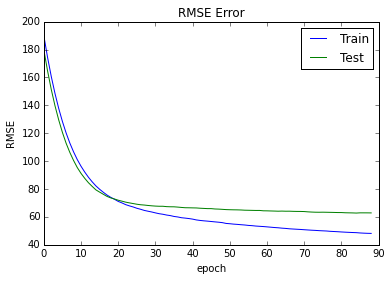

In [69]:
fig, ax = plt.subplots()
results = modelbest.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.title('RMSE Error')
plt.show()


Analysis of the most important features

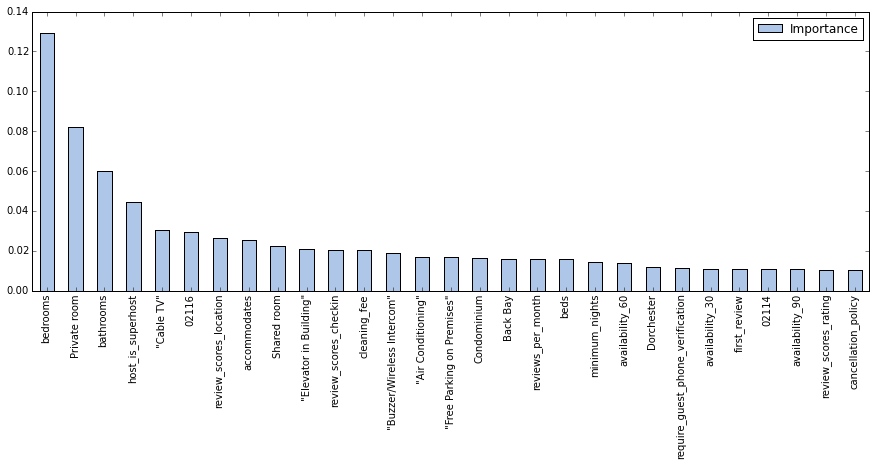

In [125]:
imp = pd.DataFrame(index= features.tolist())
imp['Importance'] = list(modelbest.feature_importances_)
imp[imp.Importance>0.01].sort_values(by='Importance',ascending=False).plot(kind='bar',color=tableau20[1],figsize=(15,5))